# **Part 1:** Nearest Neighbour Algorithm
*by Hamza Sheikh (hshei001), Jaykumar Halpati (jhalp001) and Hardik Ramesh (hrame001).*

This notebook demonstrates an implementation of the Nearest Neighbour algorithm without the use of any nearest neigbour algorithm libraries.

We will be analysing two different distance measurements, Euclidian and Manhattan; recording our results in terms of the prediction accuracy of the algorithm, based on these two distance measurements.

In [1]:
import pandas as pd
import numpy as np
import operator
from operator import itemgetter
import math
from math import *
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_dataset = pd.read_csv("data/sonar_train.csv")
test_dataset = pd.read_csv("data/sonar_test.csv")
print(train_dataset.head())
print(test_dataset.head())

       A1      A2      A3      A4      A5  ...     A57     A58     A59     A60  Class
0  0.0079  0.0086  0.0055  0.0250  0.0344  ...  0.0059  0.0058  0.0059  0.0032      R
1  0.0599  0.0474  0.0498  0.0387  0.1026  ...  0.0117  0.0114  0.0112  0.0100      M
2  0.0093  0.0269  0.0217  0.0339  0.0305  ...  0.0070  0.0116  0.0060  0.0110      R
3  0.0151  0.0320  0.0599  0.1050  0.1163  ...  0.0011  0.0019  0.0023  0.0062      R
4  0.0317  0.0956  0.1321  0.1408  0.1674  ...  0.0092  0.0143  0.0036  0.0103      R

[5 rows x 61 columns]
       A1      A2      A3      A4      A5  ...     A57     A58     A59     A60  Class
0  0.0125  0.0152  0.0218  0.0175  0.0362  ...  0.0017  0.0041  0.0086  0.0058      R
1  0.0530  0.0885  0.1997  0.2604  0.3225  ...  0.0171  0.0146  0.0134  0.0056      M
2  0.0368  0.0279  0.0103  0.0566  0.0759  ...  0.0009  0.0086  0.0110  0.0052      M
3  0.0164  0.0173  0.0347  0.0070  0.0187  ...  0.0032  0.0035  0.0056  0.0040      R
4  0.0216  0.0124  0.0174  0.01

In [0]:
# reformatting training set and test set values from class values
# replacing class values with 0s and 1s

train_x = train_dataset.values[:,0:-1].astype(float)

le = LabelEncoder()

target = train_dataset.Class

le = LabelEncoder.fit(le, y = ["R", "M"])
train_y = le.transform(target)

test_x = test_dataset.values[:,0:-1].astype(float)

target2 = test_dataset.Class

le2 = LabelEncoder.fit(le, y = ["R", "M"])
test_y = le2.transform(target2)

In [4]:
print(train_x)

[[0.0079 0.0086 0.0055 ... 0.0058 0.0059 0.0032]
 [0.0599 0.0474 0.0498 ... 0.0114 0.0112 0.01  ]
 [0.0093 0.0269 0.0217 ... 0.0116 0.006  0.011 ]
 ...
 [0.0015 0.0186 0.0289 ... 0.001  0.0032 0.0047]
 [0.0411 0.0277 0.0604 ... 0.005  0.0085 0.0044]
 [0.027  0.0163 0.0341 ... 0.0094 0.0105 0.0093]]


In [5]:
train_y

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0])

In [6]:
# train = [[row, train_y[i]] for i, row in enumerate(train_x)]

train = np.asarray(list(zip(train_x,train_y))) # more pythonic method (same as above commented line)
train[0]

array([array([0.0079, 0.0086, 0.0055, 0.025 , 0.0344, 0.0546, 0.0528, 0.0958,
       0.1009, 0.124 , 0.1097, 0.1215, 0.1874, 0.3383, 0.3227, 0.2723,
       0.3943, 0.6432, 0.7271, 0.8673, 0.9674, 0.9847, 0.948 , 0.8036,
       0.6833, 0.5136, 0.309 , 0.0832, 0.4019, 0.2344, 0.1905, 0.1235,
       0.1717, 0.2351, 0.2489, 0.3649, 0.3382, 0.1589, 0.0989, 0.1089,
       0.1043, 0.0839, 0.1391, 0.0819, 0.0678, 0.0663, 0.1202, 0.0692,
       0.0152, 0.0266, 0.0174, 0.0176, 0.0127, 0.0088, 0.0098, 0.0019,
       0.0059, 0.0058, 0.0059, 0.0032]),
       1], dtype=object)

In [7]:
test = np.asarray(list(zip(test_x,test_y)))
test[0]

array([array([0.0125, 0.0152, 0.0218, 0.0175, 0.0362, 0.0696, 0.0873, 0.0616,
       0.1252, 0.1302, 0.0888, 0.05  , 0.0628, 0.1274, 0.0801, 0.0742,
       0.2048, 0.295 , 0.3193, 0.4567, 0.5959, 0.7101, 0.8225, 0.8425,
       0.9065, 0.9802, 1.    , 0.8752, 0.7583, 0.6616, 0.5786, 0.5128,
       0.4776, 0.4994, 0.5197, 0.5071, 0.4577, 0.3505, 0.1845, 0.189 ,
       0.1967, 0.1041, 0.055 , 0.0492, 0.0622, 0.0505, 0.0247, 0.0219,
       0.0102, 0.0047, 0.0019, 0.0041, 0.0074, 0.003 , 0.005 , 0.0048,
       0.0017, 0.0041, 0.0086, 0.0058]),
       1], dtype=object)

In [0]:
# calculate euclidian distance

def e_distance(x1, x2):
  points = zip(x1, x2)
  ds_distance = [pow(a - b, 2) for (a, b) in points]
  return sqrt(sum(ds_distance))

# calculate manhattan distance

def m_distance(x1, x2):
  return sum(abs(a - b) for a, b in zip(x1, x2))

In [9]:
print(e_distance(train[0][0], train[1][0]))
print(m_distance(train[0][0], train[1][0]))

0.9932319970681575
5.4916


In [0]:
# getting the distance to all neighbours

# euclidian
def t_dist_e(training_instance, test_instance):
  return (training_instance, e_distance(test_instance, training_instance[0]))

# manhattan
def t_dist_m(training_instance, test_instance):
  return (training_instance, m_distance(test_instance, training_instance[0]))

def find_neighbours(dist, training_set, test_instance, k):
  distances = [dist(training_instance, test_instance) for training_instance in training_set]
  
  # index 1 : calculated distance between training_instance and test_instance
  sort_dist = sorted(distances, key=itemgetter(1))

  # extract only training instances
  sort_t_inst = [tuple[0] for tuple in sort_dist]

  # select first k elements
  return sort_t_inst[:k]

In [11]:
print(t_dist_e(train[0], test[0][0]))
print(t_dist_m(train[0], test[0][0]))

(array([array([0.0079, 0.0086, 0.0055, 0.025 , 0.0344, 0.0546, 0.0528, 0.0958,
       0.1009, 0.124 , 0.1097, 0.1215, 0.1874, 0.3383, 0.3227, 0.2723,
       0.3943, 0.6432, 0.7271, 0.8673, 0.9674, 0.9847, 0.948 , 0.8036,
       0.6833, 0.5136, 0.309 , 0.0832, 0.4019, 0.2344, 0.1905, 0.1235,
       0.1717, 0.2351, 0.2489, 0.3649, 0.3382, 0.1589, 0.0989, 0.1089,
       0.1043, 0.0839, 0.1391, 0.0819, 0.0678, 0.0663, 0.1202, 0.0692,
       0.0152, 0.0266, 0.0174, 0.0176, 0.0127, 0.0088, 0.0098, 0.0019,
       0.0059, 0.0058, 0.0059, 0.0032]),
       1], dtype=object), 1.7959556369799337)
(array([array([0.0079, 0.0086, 0.0055, 0.025 , 0.0344, 0.0546, 0.0528, 0.0958,
       0.1009, 0.124 , 0.1097, 0.1215, 0.1874, 0.3383, 0.3227, 0.2723,
       0.3943, 0.6432, 0.7271, 0.8673, 0.9674, 0.9847, 0.948 , 0.8036,
       0.6833, 0.5136, 0.309 , 0.0832, 0.4019, 0.2344, 0.1905, 0.1235,
       0.1717, 0.2351, 0.2489, 0.3649, 0.3382, 0.1589, 0.0989, 0.1089,
       0.1043, 0.0839, 0.1391, 0.0819, 0.0678

In [12]:
# predictions and voting

e_predictions = []
m_predictions = []

def mostvote(neighbours):
  # index 1 is the class
  classes = [neighbour[1] for neighbour in neighbours]
  count = Counter(classes)
  return count.most_common()[0][0]

# classification using euclidian distance
for x in range(len(test_x)):
  print('Classifying test row ' + str(x) + ":")
  e_neighbours = find_neighbours(t_dist_e, train, test[x][0], 1)
  e_most_vote = mostvote(e_neighbours)
  e_predictions.append(e_most_vote)
  print('Predicted label=' + str(e_most_vote) + ', Actual label=' + str(test[x][1]))

Classifying test row 0:
Predicted label=1, Actual label=1
Classifying test row 1:
Predicted label=0, Actual label=0
Classifying test row 2:
Predicted label=0, Actual label=0
Classifying test row 3:
Predicted label=1, Actual label=1
Classifying test row 4:
Predicted label=1, Actual label=1
Classifying test row 5:
Predicted label=0, Actual label=1
Classifying test row 6:
Predicted label=0, Actual label=0
Classifying test row 7:
Predicted label=0, Actual label=0
Classifying test row 8:
Predicted label=0, Actual label=0
Classifying test row 9:
Predicted label=0, Actual label=1
Classifying test row 10:
Predicted label=1, Actual label=1
Classifying test row 11:
Predicted label=1, Actual label=1
Classifying test row 12:
Predicted label=1, Actual label=1
Classifying test row 13:
Predicted label=1, Actual label=1
Classifying test row 14:
Predicted label=0, Actual label=1
Classifying test row 15:
Predicted label=0, Actual label=0
Classifying test row 16:
Predicted label=0, Actual label=0
Classif

In [13]:
# classification using manhattan distance

for x in range(len(test_x)):
  print('Classifying test row ' + str(x) + ":")
  m_neighbours = find_neighbours(t_dist_m, train, test[x][0], 1)
  m_most_vote = mostvote(m_neighbours)
  m_predictions.append(m_most_vote)
  print('Predicted label=' + str(m_most_vote) + ', Actual label=' + str(test[x][1]))

Classifying test row 0:
Predicted label=1, Actual label=1
Classifying test row 1:
Predicted label=0, Actual label=0
Classifying test row 2:
Predicted label=0, Actual label=0
Classifying test row 3:
Predicted label=1, Actual label=1
Classifying test row 4:
Predicted label=1, Actual label=1
Classifying test row 5:
Predicted label=0, Actual label=1
Classifying test row 6:
Predicted label=0, Actual label=0
Classifying test row 7:
Predicted label=0, Actual label=0
Classifying test row 8:
Predicted label=0, Actual label=0
Classifying test row 9:
Predicted label=0, Actual label=1
Classifying test row 10:
Predicted label=1, Actual label=1
Classifying test row 11:
Predicted label=1, Actual label=1
Classifying test row 12:
Predicted label=1, Actual label=1
Classifying test row 13:
Predicted label=1, Actual label=1
Classifying test row 14:
Predicted label=0, Actual label=1
Classifying test row 15:
Predicted label=0, Actual label=0
Classifying test row 16:
Predicted label=0, Actual label=0
Classif

In [14]:
# classification performance summary

print('Measuring with Euclidian distance:')
print('Accuracy: ' + str(accuracy_score(test_y, e_predictions)) + "\n")

print('Measuring with Manhattan distance:')
print('Accuracy: ' + str(accuracy_score(test_y, m_predictions)) + "\n")

Measuring with Euclidian distance:
Accuracy: 0.8985507246376812

Measuring with Manhattan distance:
Accuracy: 0.8840579710144928



[[36  1]
 [ 6 26]]
[[35  2]
 [ 6 26]]


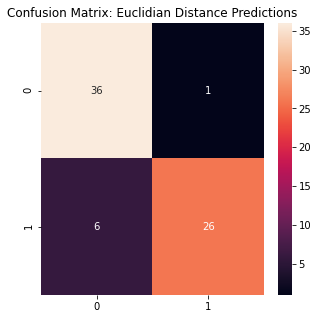

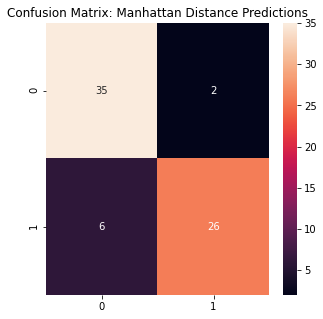

In [15]:
# data visualisation

e_cm = confusion_matrix(test_y, e_predictions)
m_cm = confusion_matrix(test_y, m_predictions)

print(e_cm)
print(m_cm)

plt.figure(figsize = (5,5))
sns.heatmap(e_cm, annot=True)
plt.title('Confusion Matrix: Euclidian Distance Predictions')
plt.show()

plt.figure(figsize = (5,5))
sns.heatmap(m_cm, annot=True)
plt.title('Confusion Matrix: Manhattan Distance Predictions')
plt.show()